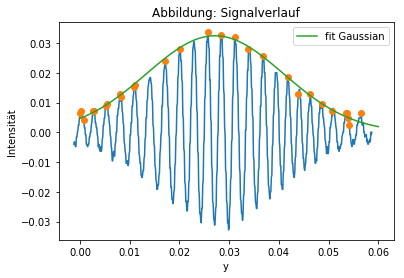

[ 0.03242323  0.02716467  0.01378071]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.optimize import curve_fit

# Read in data -- first 2 rows are header in this example. 
x, y= np.loadtxt('versuch 232.txt', unpack = True)

# determine the indices of the local maxima
maxInd = argrelextrema(y, np.greater)
# find the local maxima and remove false value
ymax = []
xmax = []
for t in range(0, len(maxInd[0])):
    if y[maxInd[0][t]] > 0:
        ymax.append(y[maxInd[0][t]])
        xmax.append(x[maxInd[0][t]])
        
# gaussian fit
#Gaussian function
def gauss_function(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))
#estimate mean and standard deviation
mean = 0.028
sigma = 0.01
#do the fit!
popt, pcov = curve_fit(gauss_function, xmax, ymax, p0 = [1, mean, sigma])

xi = np.linspace(0, 0.06, 100)

plt.plot(x, y)
plt.plot(xmax, ymax, "o")
plt.plot(xi, gauss_function(xi, *popt), label = "fit Gaussian")
plt.title('Abbildung: Signalverlauf')
plt.xlabel('y')
plt.ylabel('Intensität')
plt.legend()
plt.show()
print(popt)
